# Análise de Dados sobre dados de Queimadas do INPE

url dos dados do INPE: https://queimadas.dgi.inpe.br/queimadas/dados-abertos/#

**Sumário**
+ Fonte de dados:
  - Será buscado os dados da aba `diário`, o dia anterior a hoje (gerado automaticamente epla variável `today`)

# Import Dataset from INPE API

In [4]:
import os
import pandas as pd
import numpy as np
import netCDF4 as nc
import datetime
from datetime import date
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import urllib

In [30]:
yesterday = date.today() - datetime.timedelta(days=1)
yesterday_file_name = yesterday.strftime("%Y_%m_%d")
yesterday_title = yesterday.strftime("%d/%m/%Y")
yesterday = yesterday.strftime("%Y%m%d")
yesterday

'20220721'

In [6]:
base_url = 'https://queimadas.dgi.inpe.br/home/downloadfile?path=%2Fapp%2Fapi%2Fdata%2Fdados_abertos%2Ffocos%2FDiario%2Ffocos_abertos_24h_XXX.csv'
base_url = base_url.replace('XXX', yesterday)
base_url

'https://queimadas.dgi.inpe.br/home/downloadfile?path=%2Fapp%2Fapi%2Fdata%2Fdados_abertos%2Ffocos%2FDiario%2Ffocos_abertos_24h_20220721.csv'

In [7]:
file_name = 'inpe_queimadas_um_mes_desde_' + yesterday_file_name + '.csv'
file_name

'inpe_queimadas_um_mes_desde_2022_07_21.csv'

In [8]:
# donwload and genereta locally csv
urllib.request.urlretrieve(base_url, file_name)

('inpe_queimadas_um_mes_desde_2022_07_21.csv',
 <http.client.HTTPMessage at 0x1a54359d7f0>)

In [9]:
# load csv
df = pd.read_csv(file_name)

# Pré-processamento de dados

## Filter Data to country Brasil

In [10]:
df = df.query('pais == "Brasil"')

## Data Infos

In [11]:
df['data_hora_gmt'].shape

(8655,)

In [12]:
df.head(1)

,id,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp,geom
9,c54f62fd-67b5-3e6a-ad52-721a20a1d12b,-18.43,-53.17,2022-07-21 00:03:30,GOES-16,COSTA RICA,MATO GROSSO DO SUL,Brasil,5003256,50,33,NaN,NaN,NaN,Cerrado,NaN,0101000020E6100000F6285C8FC2954AC0AE47E17A146E...


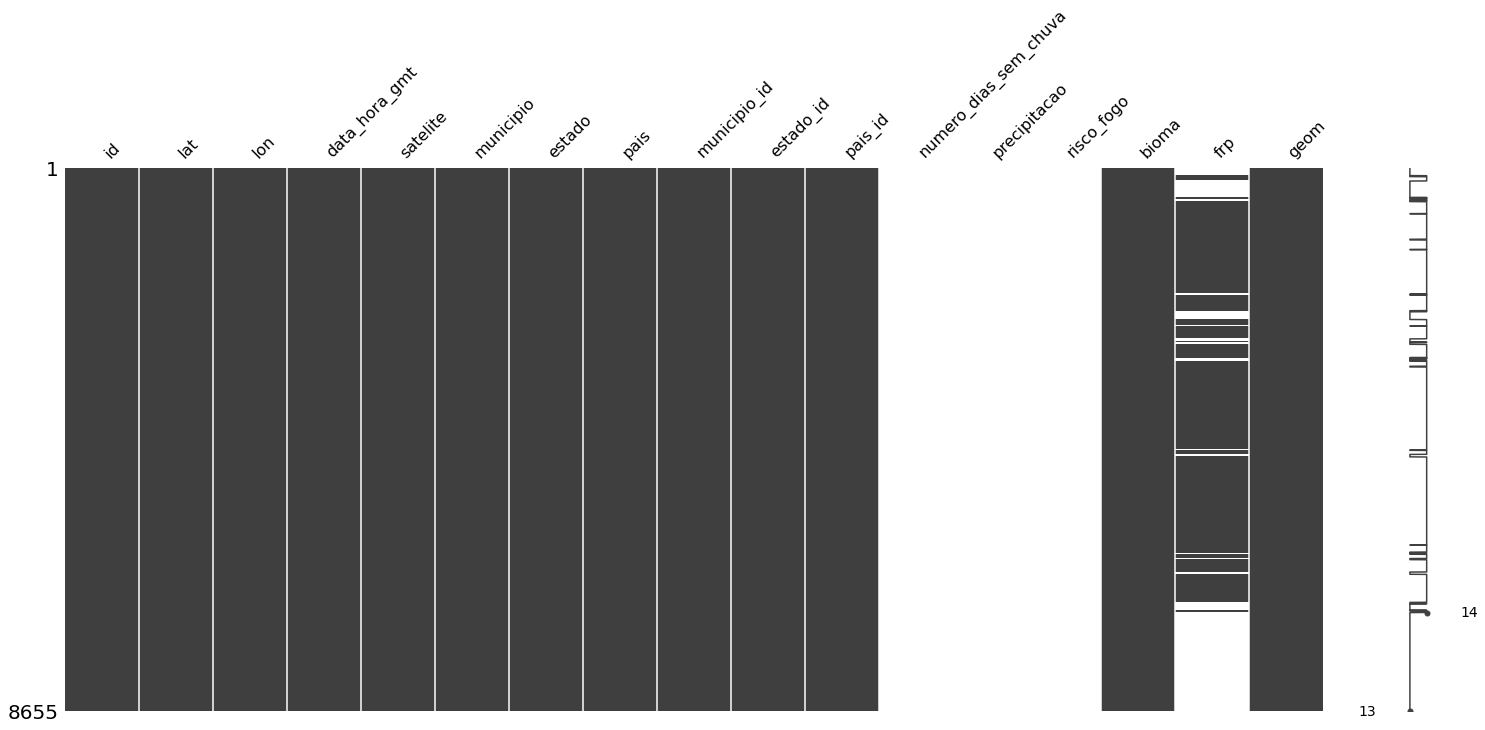

In [13]:
msno.matrix(df);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8655 entries, 9 to 106867
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     8655 non-null   object 
 1   lat                    8655 non-null   float64
 2   lon                    8655 non-null   float64
 3   data_hora_gmt          8655 non-null   object 
 4   satelite               8655 non-null   object 
 5   municipio              8655 non-null   object 
 6   estado                 8655 non-null   object 
 7   pais                   8655 non-null   object 
 8   municipio_id           8655 non-null   int64  
 9   estado_id              8655 non-null   int64  
 10  pais_id                8655 non-null   int64  
 11  numero_dias_sem_chuva  0 non-null      float64
 12  precipitacao           0 non-null      float64
 13  risco_fogo             0 non-null      float64
 14  bioma                  8655 non-null   object 
 15  fr

## Type of Data

In [15]:
df['data_hora_gmt'] = pd.to_datetime(df['data_hora_gmt'], format="%Y-%m-%d %H:%M:%S")          

In [16]:
df['data_dia_mes'] = df['data_hora_gmt'].dt.strftime('%Y-%m-%d')

# Análise Exploratória de Dados

In [17]:
df.head(1)

,id,lat,lon,data_hora_gmt,satelite,municipio,estado,pais,municipio_id,estado_id,pais_id,numero_dias_sem_chuva,precipitacao,risco_fogo,bioma,frp,geom,data_dia_mes
9,c54f62fd-67b5-3e6a-ad52-721a20a1d12b,-18.43,-53.17,2022-07-21 00:03:30,GOES-16,COSTA RICA,MATO GROSSO DO SUL,Brasil,5003256,50,33,NaN,NaN,NaN,Cerrado,NaN,0101000020E6100000F6285C8FC2954AC0AE47E17A146E...,2022-07-21


In [19]:
df['estado'].value_counts()

MARANHÃO               1465
TOCANTINS              1329
MATO GROSSO            1130
PARÁ                   1082
MATO GROSSO DO SUL      516
MINAS GERAIS            515
RONDÔNIA                495
GOIÁS                   484
AMAZONAS                483
BAHIA                   298
PIAUÍ                   260
ACRE                    206
SÃO PAULO               191
PARANÁ                   53
RIO DE JANEIRO           39
RIO GRANDE DO SUL        30
RIO GRANDE DO NORTE      17
ESPÍRITO SANTO           15
DISTRITO FEDERAL         13
SANTA CATARINA           10
RORAIMA                  10
CEARÁ                     8
PERNAMBUCO                4
ALAGOAS                   1
AMAPÁ                     1
Name: estado, dtype: int64

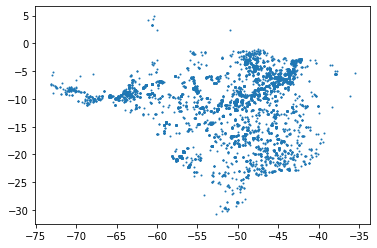

In [20]:
plt.scatter(x=df['lon'], y=df['lat'], s=1);

In [52]:
my_colors = px.colors.qualitative.Alphabet + px.colors.qualitative.Light24
my_colors = ['#B279A2' if item == '#E2E2E2' else item for item in my_colors] # Troca cinza por um roxo

In [53]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="lat", lon="lon", hover_name="municipio", hover_data=["estado", "municipio"],
                        color='estado', zoom=3, height=300,
                       color_discrete_sequence=my_colors)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()